# Balancer Simulations Math Challenge - Basic Exercises

This is a series of exercises to gain intuition for the core algorithm in Balancer Pools: the Value Function, and invariant V.

**Exercise:** We'll work on Step 1 questions in our working session on May 25 in teams of 2, facilitated by @Octopus and @akrtws.  
**Challenges:** Step 2 will be homework assignments, submitting at least one challenge solved is mandatory for successful participation!  
Here's the notebook with challenges: https://github.com/TokenEngineeringCommunity/BalancerPools_Model/blob/fcb67145e8b0f8a1843fe3c6921dbb5a7085938e/Math%20Challenges-Advanced.ipynb

## Exercise:   
Let's set up a pool.  

We have 100 Token A and 100 Token B, with equal weights.  
The price definition in our pool is constraint by the
Invariant V in Balancer Pools. 

a_bal = balance of token A  
b_bal = balance of token B  
a_weight = weight of token A  
b_weight = weight of token B   

The weights in this pool are equal for both tokens.
For now, we don't have a swap fee.

# Q1.1: 
What's the initial spot price of token A in token B?

###############
#The initial price is 1. 1 unit of A equals 1 unit of B at the initial stage because the pool has NO WEIGHTS and BALANCES IN POOL ARE EQUAL.

# Q1.2:
Now let's assume a series of 99 swaps. With every swap, **1.0 token A is bought from the pool, against token B**.  

**a) Create a table "buy_A"** with

    the token A balances (swap by swap)
    the token B balances (swap by swap) - that are constraint by the value function. 

**b) What do you notice in general?**
Write down your findings (in words).

**c) How much would Alice have to pay in token B when buying the first 1.0 token A?**
Write down your findings (in words). Compare with the initial Spotprice.

In [2]:
#import sections
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [23]:
a_balance = 100 # initial A balance
b_balance = 100 # initial B balance
a_weight = 0.5 
b_weight = 0.5
# V = a*b
# at start it is a_weight*b_weight = b_bal * a_bal ∣ 1=b_bal * a_bal
invariant = (a_balance**a_weight)*(b_balance**b_weight)
# function for calculating each row
# takes in balances, outputs new balances and effective price for a swap of 1
# new balance = 

#index column vector
a_vals = pd.Series(range(100,0,-1))

#create dataframe with based on a_vals
buy_A = pd.DataFrame(a_vals, columns=['tA'])
buy_A['invariant'] = invariant #value required to calculate token B value

#create values for plot, add Y_balances according to current invariant
buy_A['tB'] = (buy_A.invariant/(buy_A.tA**a_weight))**(1/b_weight)# calculate corresponding token_B value according to invariant

buy_A.head(27)

,tA,invariant,tB
0,100,100.0,100.000000
1,99,100.0,101.010101
2,98,100.0,102.040816
3,97,100.0,103.092784
4,96,100.0,104.166667
5,95,100.0,105.263158
6,94,100.0,106.382979
7,93,100.0,107.526882
8,92,100.0,108.695652
9,91,100.0,109.890110


In [12]:
print('b) If Alice start with only a single A-token purchase she would have to pay 1 B-token. The price increase with larger purchases is very steep, if she purchased 25 B-token she would pay 33% more than if she had access to a "instnatnly" balanced pool.')
print('b) IF nothing in the pool changes between trades then Alice will pay the same whether she makes 50 trades of 1 or 1 50 token trade. Of course, only if there are no fees.')
print('c) Initial spot price is 1.0. It would seem that the price needs to be the same in either direction but the formula applied for the other direction results in different signs (in given out) inside the brackets and thus leads to a different result: the price for the first A-token is 1.01010101!')

b) If Alice start with only a single A-token purchase she would have to pay 1 B-token. The price increase with larger purchases is very steep, if she purchased 25 B-token she would pay 33% more than if she had access to a "instnatnly" balanced pool.
b) IF nothing in the pool changes between trades then Alice will pay the same whether she makes 50 trades of 1 or 1 50 token trade. Of course, only if there are no fees.
c) Initial spot price is 1.0. It would seem that the price needs to be the same in either direction but the formula applied for the other direction results in different signs (in given out) inside the brackets and thus leads to a different result: the price for the first A-token is 1.01010101!


# Q1.3:

Now let's assume a series of 99 swaps in the opposite direction. We start again with the original state: We have 100 Token A and 100 Token B.   
With every swap, **1.0 token B is bought from the pool, against token A**.

Create a table **'buy_B'** with

    the token A balances (swap by swap)
    the token B balances (swap by swap) - that are constraint by the value function.
  

In [22]:
#As above
b_vals = pd.Series(range(100,0,-1))
buy_B = pd.DataFrame(b_vals, columns=['tB'])
buy_B['invariant'] = invariant #value required to calculate token B value

#create values for plot, add a_balances according to current invariant
buy_B['tA'] = (buy_B.invariant/(buy_B.tB**b_weight))**(1/a_weight)# calculate corresponding token A value according to invariant

buy_B.tail(50)

,tB,invariant,tA
50,50,100.0,200.000000
51,49,100.0,204.081633
52,48,100.0,208.333333
53,47,100.0,212.765957
54,46,100.0,217.391304
55,45,100.0,222.222222
56,44,100.0,227.272727
57,43,100.0,232.558140
58,42,100.0,238.095238
59,41,100.0,243.902439


# Q1.4:

a) What are the new balances of token A and token B after 90 swaps token A (in) for B (out)?

b) How much would Alice have to pay in token A in case she wants to buy the 91st token B? 

In [17]:
# a) 1000 A-token and 10 B-token
# b) bal_A(91) - bal_A(90) = 111.11...

# Q1.5:  
Now create a graph (use plotly or similar), and draw the full curve for this series of both kinds of swaps - the AMM curve.

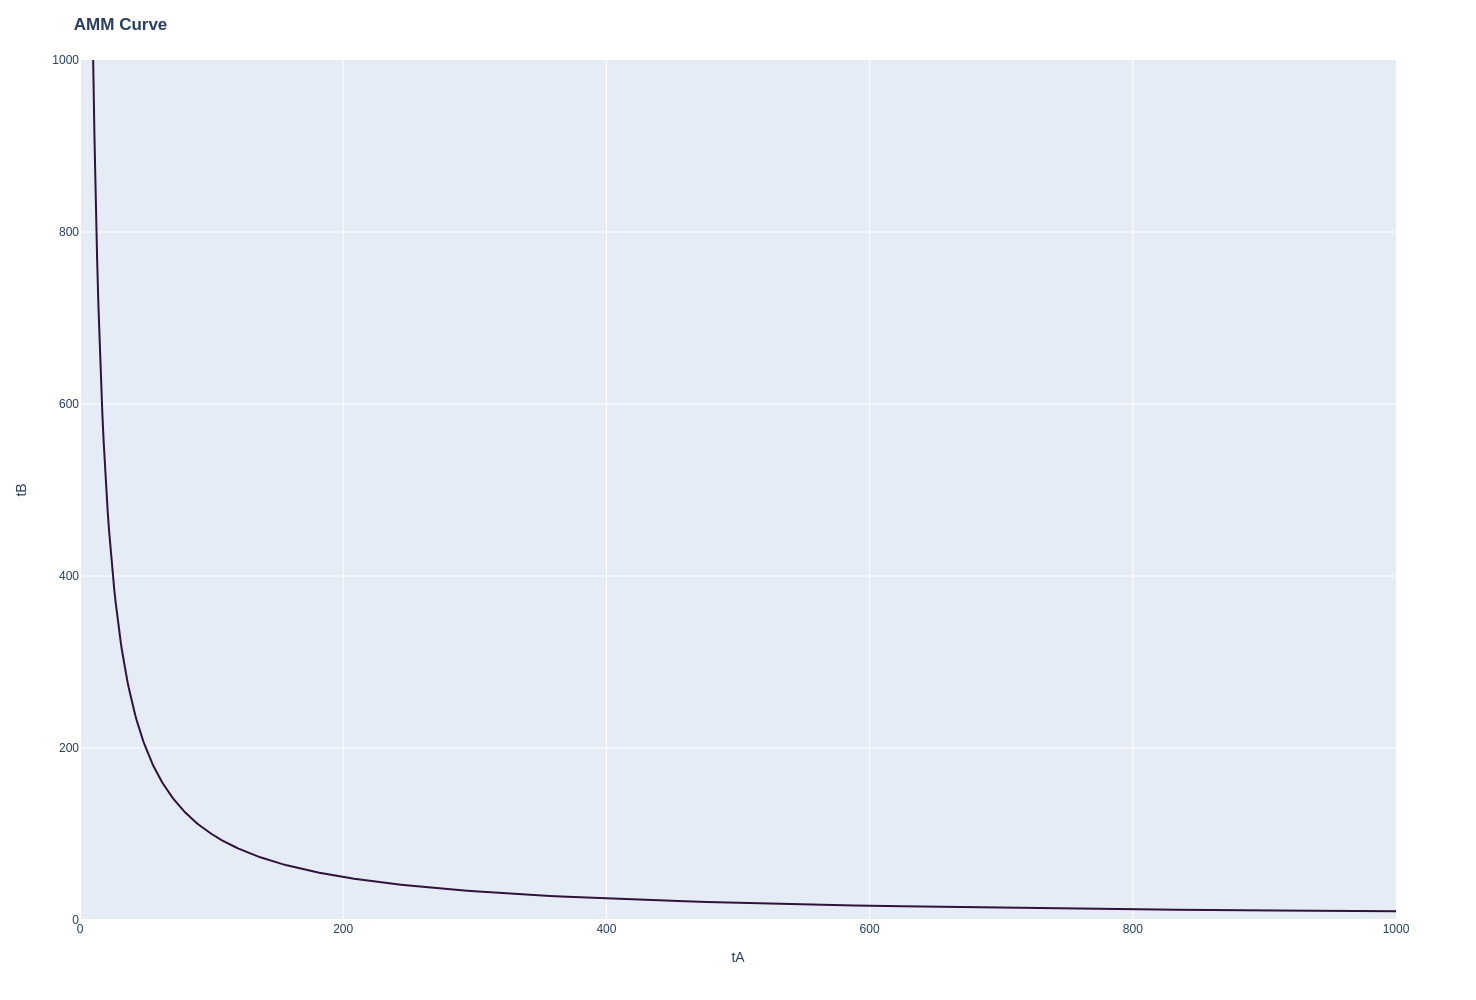

In [53]:
## buy_A, buy_B

#Remove unneeded cols in df
# del buy_A['invariant']
# del buy_B['invariant']

# plotvals = buy_A.merge(buy_B, left_on='lkey', right_on='rkey')
# plotvals = buy_A.merge(buy_B)
curve2 = pd.concat([buy_A, buy_B.iloc[::-1]], axis=0, ignore_index=True)

fig = px.line(curve2, x="tA", y="tB", color_discrete_sequence=px.colors.sequential.Turbo)
fig.update_xaxes(range=[0, 1000])
fig.update_yaxes(range=[0, 1000])
fig.update_layout(height=1000, width=1000, title_text='<b>AMM Curve</b>')

fig.show()


# Q1.6:
Take this plot, and mark 
- the initial price in Q1.1 (starting price)
- the new price in Q1.4 (after 90 swaps)

Side note: Why is it actually not appropriate to call this a "price". What would be a better name?

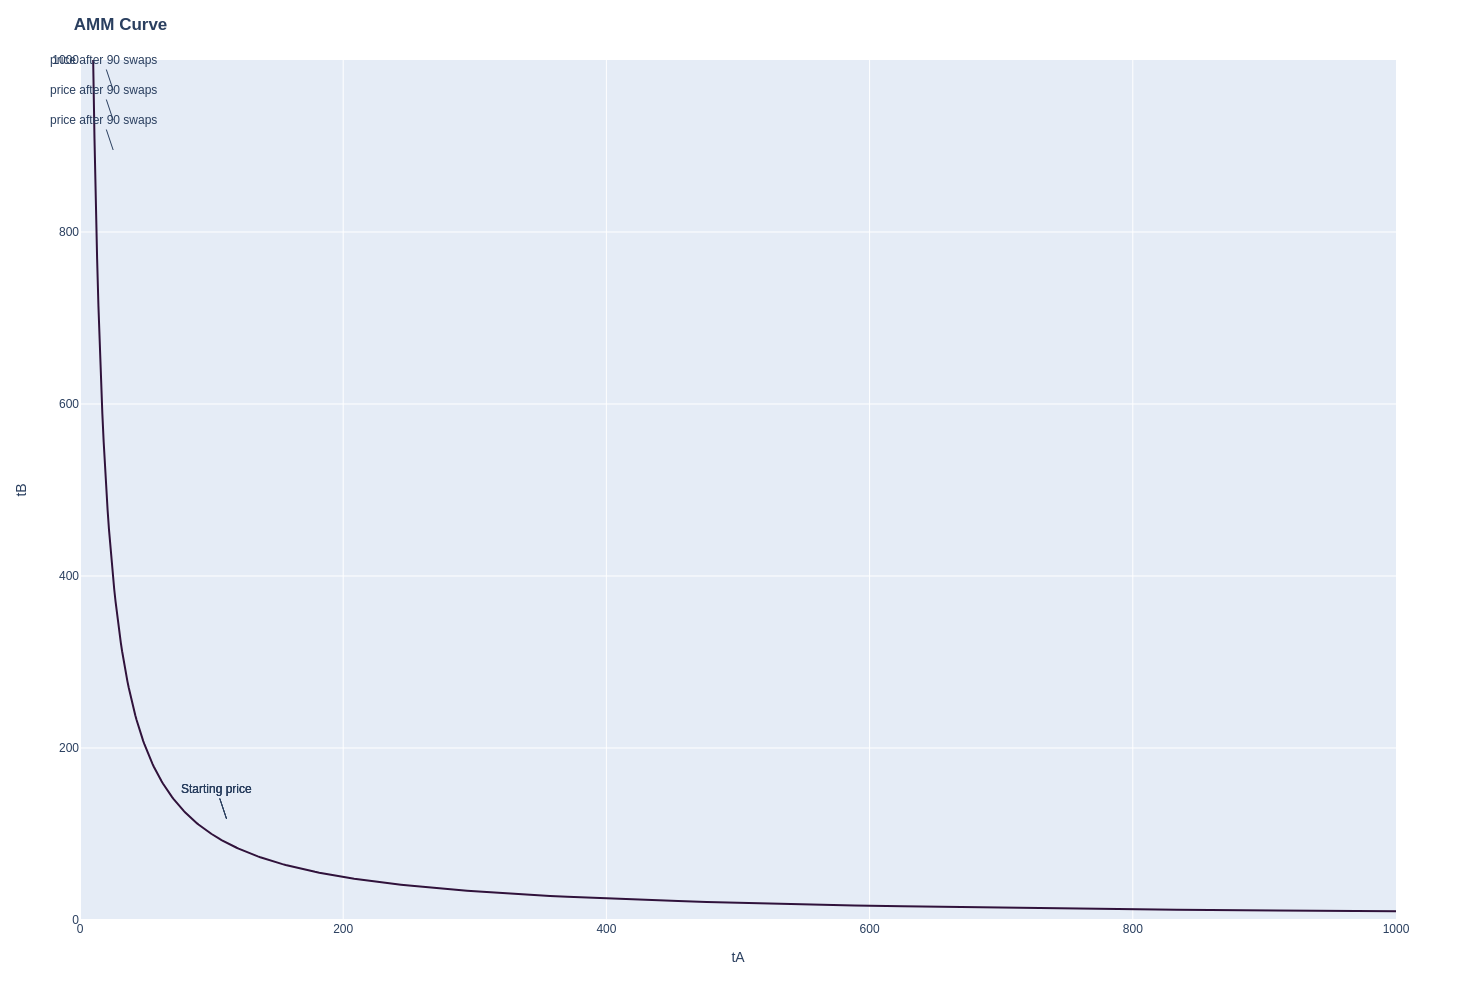

In [56]:
# THis is basically a plot of balances, so the cooridnates need to be 100,100 and 10,1000 accoridng to the dfs from the Q1.1 an Q1.4
# it is not a price but a "balances coordinate"
fig.add_annotation(x=100, y=100, text="Starting quasi-price", showarrow=True, yshift=15, xshift=15)
fig.add_annotation(x=10, y=1000, text="90 swap quasi-price", showarrow=True, yshift=-90, xshift=20)

# Q1.7:
Formulate a "rule of a thumb", how do swaps effect the price?

In [57]:
print('Every swap increases the price that needs to be paid in the other token, no matter who makes the trade, as long as pool balances do not change.') 
print('There is a exponential relationship between price change and "remaining balance". If 50% of tokens are sold, the price for the 51st tokens after that is 4.08x the first token\'s price.') 

Every swap increases the price that needs to be paid in the other token, no matter who makes the trade, as long as pool balances do not change.
There is a exponential relationship between price change and "remaining balance". If 50% of tokens are sold, the price for the 51st tokens after that is 4.08x the first token's price.


## Additional questions:

**Q1.8:** Buying A) 99 tokens at once vs. B) buying 99x 1 token
Is there a difference in terms of the number of tokens you have to swap in? Is it "more expensive" to swap 99 times?

#### Answer
No, the swap operations happen upon the balances - i.e. the prices to be paid are just different states of the pool (which is what we have calculated above). We pay the same amount no matter how much we buy at once. **In other words: the areas difference between two different pool states is the same as the sum of all area state changes after each smaller trade.**

**Q1.9:** Swap fees for buying 99 tokens at once vs. buying 99x 1 token
Again, does it matter in terms of the total amount of tokens (change in balance+ fees) you have to pay?
#### Answer
The swap fee is applied to each trade (not simulated here) according to the whitepaper. This makes it more expensive to make many trades.

**Q1.10:** Price changes and position at the curve
For a relative change in price, does it matter where we are at the curve? ( @mark richardson | bancor explained it very nicely, you might want to watch the recording again, will share it by tomorrow)
#### Answer
Not sure how to interpret this question.

**Q1.11:** Price changes, position at the curve and unequal weights
What's the effect of weights on this? If weights are not equal, and we want to move prices, does it matter where we are at the curve?
#### Answer
The direction matters if we have fixed weights. If we are tackling a In Given Out trade the exponent of the relative balance quotient is **larger/smaller** than 1, for an Out given IN trade it it **smaller/larger** than 1. If the higher weighted token is in the denominator then price paid **rises/falls** depending on the trade type.

## Solution Q1.9 - by @AngelaKTE (Twitter @akrtws)
Swap fees for buying 99 tokens at once vs. buying 99x 1 token Again, does it matter in terms of the total amount of tokens you have to pay/send to the pool?

**Answer: Yes, is does matter. With fees, it's more expensive to buy 99 x1 tokens.**

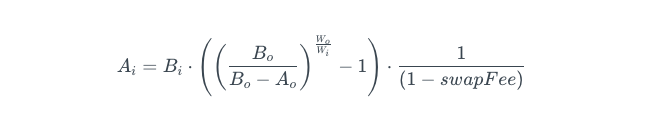

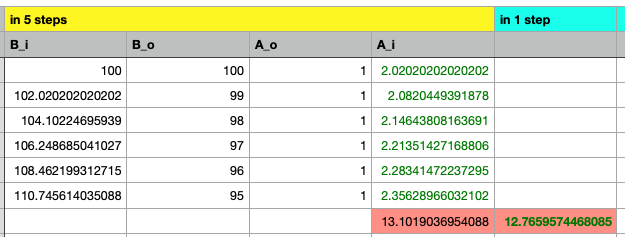

# Now, let's consider weights!

We continue with the value function V = a^w_a*b^w_b  
where  
a = balance of token asset A  
b = balancer of token asset B  
w_a = weight of token asset A  
w_b = weight of token asset B  

# Q2.1:  
Write down the value function for the pool in Q1.1!

In [58]:
# V = (100^(0.5))*(100^(0.5))

# Q2.2:
Let's got back to your initial balances in Step 1 in the pool:  
100 tokens A  
100 tokens B  

How do you need to change the weights in order to land at a **price of  
4 tokens A : 1 token B**

---
For a two-sided pool we can apply Eqn (2) from the Whitepaper - meaning the sum of all weights = 1 leads to the elimination of one variable: $w_b = 1-w_a$
If the spotprice of A is 4x the spot price of B, we must satisfy eqn. 2 as follows

$$4 = \frac{\frac{100}{w_a}}{\frac{100}{1-w_a}}$$

Solving for $w_a$ we get

$$1 = 5w_a$$ i.e. $w_a = 0.2$. 

---


Provide the new value function!

# Q2.3:
Create a graph showing the new AMM Curve in Q2.2  
Compare to the graph in Q1.4 - how does a change in weights change the graph?

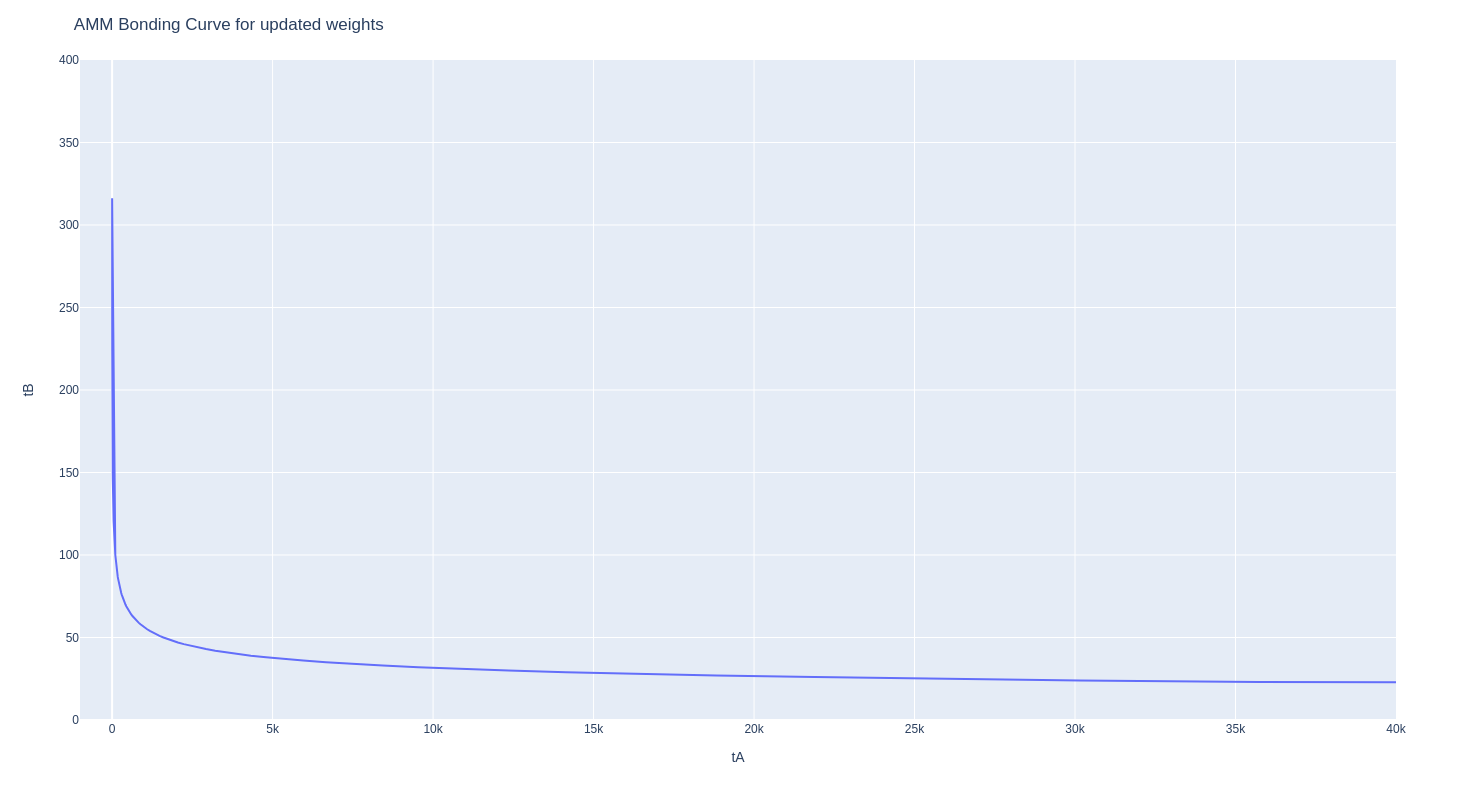

In [68]:
a_balance = 100 # initial balance
b_balance = 100 # initial balance
a_weight = 0.2 
b_weight = 0.8 

# V = a*b
# at start it is a_weight*b_weight = b_bal * a_bal ∣ 1=b_bal * a_bal
invariant = (a_balance**a_weight)*(b_balance**b_weight)
# function for calculating each row
# takes in balances, outputs new balances and effective price for a swap of 1
# new balance = 

#index column vectors
a_indexvec = pd.Series(range(100,0,-1))
b_indexvec = pd.Series(range(100,0,-1))

#create dataframe with based on a_vals
buyingAA = pd.DataFrame(a_indexvec, columns=['tA'])
buyingAA['invariant'] = invariant #value required to calculate token B value
#create values for plot, token_B values according to current invariant
buyingAA['tB'] = (buyingAA.invariant/(buyingAA.tA**a_weight))**(1/b_weight)# calculate corresponding y_vals according to invariant


#create dataframe with based on b_vals
buyingBB = pd.DataFrame(b_indexvec, columns=['tB'])
buyingBB['invariant'] = invariant #value required to calculate token B value

#create values for plot, add token_A values according to current invariant
buyingBB['tA'] = (buyingBB.invariant/(buyingBB.tB**b_weight))**(1/a_weight)# calculate corresponding y_vals according to invariant

#plot curves with all 
buyingAA = buyingAA.drop(columns=['invariant'])
buyingBB = buyingBB.drop(columns=['invariant'])
curve3 = pd.concat([buyingAA, buyingBB], axis=0, ignore_index=True)
plot = px.line(curve3, x="tA", y="tB")
plot.update_xaxes(range=[-1000, 40000])
plot.update_yaxes(range=[0, 400])
plot.update_layout(height=800, width=800, title_text='AMM Bonding Curve for updated weights')

plot.show()

# Q2.4:
Compare token prices in this pool.  
How much would Alice have to pay in case there are only 2 tokens left in the pool  
    **a) buy 1.0 token A for token B**  
    **b) buy 1.0 token B for token A**   

In [78]:
# b)
buyingBB.iloc[99][1]-buyingBB.iloc[98][1]

9375000000.000011

In [79]:
# a)
buyingAA.iloc[99][1]-buyingAA.iloc[98][1]

50.312971169588536

### Answers
a) with only 2 A-token left (see above) the price is 50.313 B-token.
b) with only 2 B-token left the price is 9.375 billions A-token for 1 B-token :o WHo would have thought a mere 30% imbalance would have such consequences.
